# Определение возраста покупателей

**Описание проекта**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

**Инструкция по выполнению проекта**

Проведите исследовательский анализ набора фотографий.
Подготовьте данные к обучению.
Обучите нейронную сеть и рассчитайте её качество.

**Описание данных**

Данные взяты с сайта ChaLearn Looking at People. Они находятся в папке /datasets/faces/. 

В вашем распоряжении одна папка со всеми изображениями (/final_files) и CSV-файл labels.csv с двумя колонками: file_name и real_age. 

Извлечь данные из папки вам поможет новый метод ImageDataGenerator —flow_from_dataframe(dataframe, directory, ...).

**Задание**

1. Проведите исследовательский анализ данных:

Посмотрите на размер выборки.
Постройте график распределения возраста в выборке.
Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.
Сделайте выводы о том, как результаты исследования повлияют на обучение модели.

2. Обучение модели:

Обучите модель в GPU-тренажёре и сохраните результат вывода модели на экран (Постройте и обучите свёрточную нейронную сеть на датасете с фотографиями людей. Добейтесь значения MAE на тестовой выборке не больше 8, если вы получите MAE меньше 7, это будет отличный результат!)

## Исследовательский анализ данных

Импортируем необходимые нам в работе библиотеки.

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Загрузим датасет с информацией о данных, а также папку с фотографиями.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=3301)

Found 7591 validated image filenames.


Как мы видим, у нас имеется 7591 фотография.

Взглянем на то, как выглядят сведения в датасете.

In [3]:
labels.head(5)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


Как мы видим, имеются сведения о названии файла и указании реального возраста изображенного на данной фотографии человека. Теперь посмотрим на общую инфрмацию о датасете.

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Таким образом, у нас имеется информация обо всех 7591 фотографиях. Пропусков не имеется. Посмотрим на данные о возрасте людей.

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Итак, у нас имеются фотографии людей возрастом от 1 года до 100 лет. Средний возраст людей на фотографиях 31 год (медианный - 29 лет).

Теперь построим гистограмму 

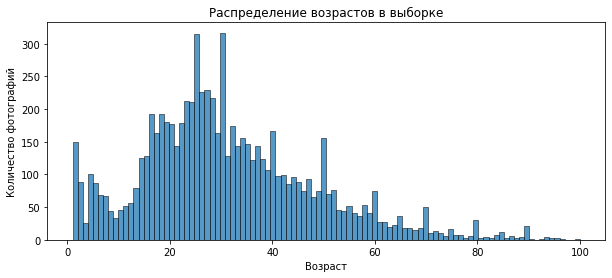

In [18]:
plt.figure(figsize=(10,4))
sns.histplot(labels.real_age, kde=False, bins=100)
plt.xlabel('Возраст')
plt.ylabel('Количество фотографий')
plt.title('Распределение возрастов в выборке')
plt.show();

Как видно из графика, в выборке значительное количество фоторгафий людей в взрасте от 16 до 41 года, также неплохо представлены фотографии детей, а фотографий людей в возрасте свыше 80 лет совсем немного. Имеется несколько ярких пиков в 25, 30, 40, 50, 60,70, 80, 90 лет, что вероятно обусловлено округлением возраста людей на некоторых фотографиях. 

Давайте также построим график Q-Q plot по нашей выборке для проверки её на нормальность распределения.

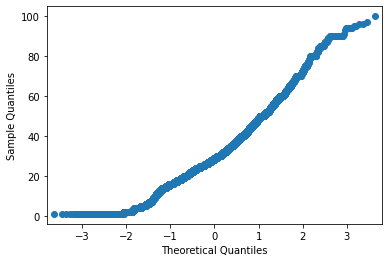

In [13]:
fig = sm.qqplot(labels.real_age)
plt.show()

Как видим, у выборки распределение не является нормальным.

Теперь давайте вглянем на несколько фоторгафий из выборки (возьмем 16, так как их легко расположить в формате 4х4).

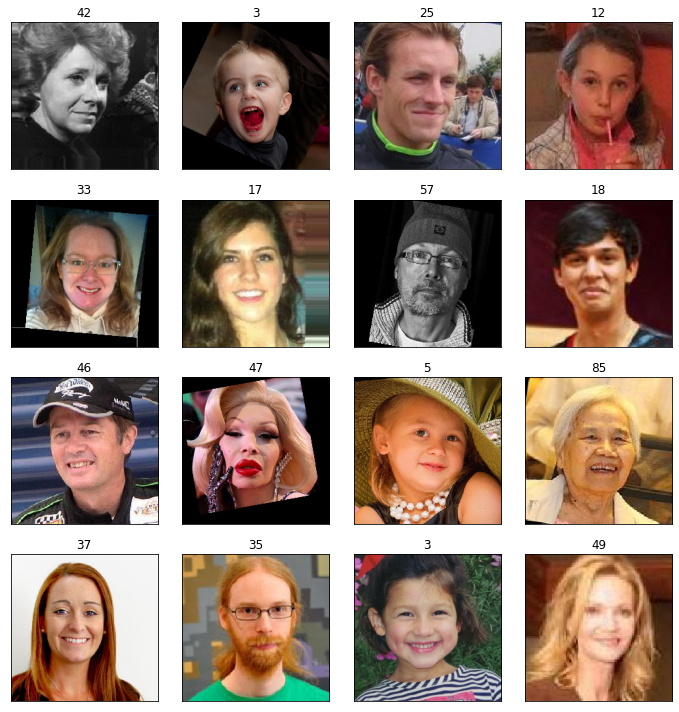

In [20]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title(target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Вывод по 1 этапу:**

Датасет имеет 7591 фотографий (не очень большое количество) людей обоего пола и различного возраста. Больше всего фотографий в диапазоне от 16 до 41 года. Также в выборке имеются дети и люди пожилого возраста.

С учетом взгляда на ряд фотографий, можно сделать вывод, что модели будет непросто оценивать возраст, фотографии неотцентрированы, зачастую наклонены, сделаны в различных ракурсах и при различном освещении, также на фотографиях могут присутствовать объекты, которые частично скрывают лицо (решетка) либо иные факторы, которые могут сказаться негативно на прогнозе (лицо может быть слегка повернутым в сторону, закрытые глаза, головные уборы и т.п.)

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускался в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd


def load_train(path):
    df = pd.read_csv('/datasets/faces/labels.csv')

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        validation_split=0.2)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=3301)

    return train_gen_flow

def load_test(path):
    df = pd.read_csv('/datasets/faces/labels.csv')

    valid_datagen = ImageDataGenerator(
        rescale=1. / 255, 
        validation_split=0.2)

    validation_gen_flow = valid_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=3301)

    return validation_gen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

Ниже приведены результаты исполнения кода.

```

Train for 190 steps, validate for 48 steps

Epoch 1/5
190/190 - 62s - loss: 229.1042 - mae: 10.8816 - val_loss: 622.1038 - val_mae: 19.8379

Epoch 2/5
190/190 - 50s - loss: 63.3600 - mae: 6.0821 - val_loss: 548.4376 - val_mae: 18.2291

Epoch 3/5
190/190 - 49s - loss: 34.3870 - mae: 4.5266 - val_loss: 244.0834 - val_mae: 11.8218

Epoch 4/5
190/190 - 47s - loss: 22.2931 - mae: 3.6713 - val_loss: 115.5123 - val_mae: 8.0544

Epoch 5/5
190/190 - 47s - loss: 17.4149 - mae: 3.2235 - val_loss: 73.0741 - val_mae: 6.3939

48/48 - 8s - loss: 73.0741 - mae: 6.3939
Test MAE: 6.3939

```

**Выводы по 2 этапу:**

Модель сверточной нейронной сети построена на ResNet50. За 5 эпох обучения удалось уменьшить MAE от почти 20 до 6.3 на тестовой выборке. С учетом того, что модель понижает показатель МАЕ как на тестовой, так и на валидационной выборке, она не переобучена. Дальнейшее обучение с добавлением эпох, возможно, могло еще больше улучшить результат.

## Анализ обученной модели

**Выводы:**

Обученная модель позволяет с высокой точностью предсказывать возраст покупателей. Получение значения МАЕ 6 - хороший показатель, с учетом того, что зачастую категории покупателей по возрасту разделяют в районе 10 лет.

Использование GPU и нейронных сетей позволяет быстро и эффективно обработать большое количество информации с высокой точностью.